In [1]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\regin\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
#'data' becomes the file handle of the open netCDF file, and the ‘r’ denotes that we want to open the file in read only mode
my_nc_file = '/Users/regin/Desktop/R/S2Scalibrationextremeheat/loadeR/2t_201902_Mar_format.nc'
data = Dataset(my_nc_file, mode='r')

In [3]:
#put each of the variables 1) lons, 2) lats, 3) tass (temperature) into numpy arrays.
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
tass = data.variables['tas'][:]
data.close()
#compute mean of the given data (array elements) along a specified axis.
ens_mean = np.mean(tass, axis=(0,1))
#print out dimension of lat and lon
print(ens_mean.shape)

(31, 51)


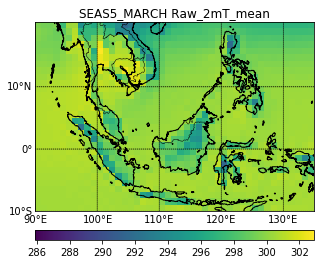

In [4]:
# Get some parameters for the Mercator Projection
#A cylindrical, conformal projection. Conformal projections preserve local shape.
#A map projection is conformal when at any point the scale is the same in every direction
lon_0 = lons.mean()
lat_0 = lats.mean()

#m = Basemap(width=5000000,height=3500000,
#            resolution='l',projection='stere',\
#            lat_ts=40, lat_0=lat_0, lon_0=lon_0)

#llcrnclon = longitude of lower left hand corner of the desired map domain (degrees)
#urcrnrlon = longitude of upper right hand corner of the desired map domain (degrees)
#llcrnrlat = latitude of lower left hand corner of the desired map domain (degrees)
#urcrnrlat = latitude of upper right hand corner of the desired map domain (degrees)
#default global map = llcrnrlon=-180,llcrnrlat=-90, urcrnrlon=180 and urcrnrlat=90
#lat_ts just represents the true scale.
#for projection = 'merc', lat_ts is optional as an argument.
#resolution of boundary database: 'c' = crude. 'h' = high, 'i' = intermediate, 'l' = low.
m = Basemap(llcrnrlon=90, llcrnrlat=-10, 
            urcrnrlon=135,urcrnrlat=20,
            projection='merc', resolution = 'i',
            lon_0=lon_0, lat_0=lat_0)

# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(ens_mean))

# Add Grid Lines
#m.drawparallels(np.arange(-10., 30., 10.), labels=[1,0,0,0], fontsize=10)
#m.drawmeridians(np.arange(90., 150., 10.), labels=[0,0,0,1], fontsize=10)

m.drawparallels(np.arange(-10., 20., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(90., 135., 10.), labels=[0,0,0,1], fontsize=10)


# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")

# Add Title
plt.title('SEAS5_MARCH Raw_2mT_mean')

plt.show()